In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBRegressor, plot_importance
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Load data
data = pd.read_csv('traffic_weather.csv')


In [211]:
data.head(20)

,Intersection Name,Month,Day,Year,Hour,Day of Week,Holiday,Direction,Speed,Volume,Full Date,date,tavg,tmin,tmax,prcp,snow,wspd,temperature
0,Azie MortonBarton Springs,7,9,2019,1,2,0,NB,28.0,9.0,2019-07-09 01:00:00,7/9/19,29.5,23.9,36.1,0.0,0,7.2,23.900000
1,Azie MortonBarton Springs,7,9,2019,1,2,0,SB,24.0,8.0,2019-07-09 01:00:00,7/9/19,29.5,23.9,36.1,0.0,0,7.2,23.900000
2,Azie MortonBarton Springs,7,9,2019,0,2,0,NB,28.0,25.0,2019-07-09 00:00:00,7/9/19,29.5,23.9,36.1,0.0,0,7.2,23.900000
3,Azie MortonBarton Springs,7,9,2019,0,2,0,SB,28.0,36.0,2019-07-09 00:00:00,7/9/19,29.5,23.9,36.1,0.0,0,7.2,23.900000
4,Azie MortonBarton Springs,7,8,2019,23,1,0,NB,27.0,26.0,2019-07-08 23:00:00,7/8/19,28.1,22.2,36.1,9.7,0,6.1,33.227611
5,Azie MortonBarton Springs,7,8,2019,23,1,0,SB,28.0,54.0,2019-07-08 23:00:00,7/8/19,28.1,22.2,36.1,9.7,0,6.1,33.227611
6,Azie MortonBarton Springs,7,8,2019,22,1,0,NB,27.0,82.0,2019-07-08 22:00:00,7/8/19,28.1,22.2,36.1,9.7,0,6.1,34.237753
7,Azie MortonBarton Springs,7,8,2019,22,1,0,SB,28.0,107.0,2019-07-08 22:00:00,7/8/19,28.1,22.2,36.1,9.7,0,6.1,34.237753
8,Azie MortonBarton Springs,7,8,2019,21,1,0,NB,26.0,99.0,2019-07-08 21:00:00,7/8/19,28.1,22.2,36.1,9.7,0,6.1,35.041926
9,Azie MortonBarton Springs,7,8,2019,21,1,0,SB,27.0,159.0,2019-07-08 21:00:00,7/8/19,28.1,22.2,36.1,9.7,0,6.1,35.041926


In [213]:
data.isnull().sum()

Intersection Name    0
Month                0
Day                  0
Year                 0
Hour                 0
Day of Week          0
Holiday              0
Direction            0
Speed                0
Volume               0
Full Date            0
date                 0
tavg                 0
tmin                 0
tmax                 0
prcp                 0
snow                 0
wspd                 0
temperature          0
dtype: int64

In [215]:
# Data Preprocessing
# Encode categorical variables
label_encoder = LabelEncoder()
data['Intersection Name'] = label_encoder.fit_transform(data['Intersection Name'])
data['Direction'] = label_encoder.fit_transform(data['Direction'])

# Select predictors and target
features = ['Intersection Name', 'Month', 'Day', 'Year', 'Hour', 'Day of Week',
            'Holiday', 'Direction', 'Speed', 'prcp', 'snow', 'wspd','temperature']
X = data[features]
y = data['Volume']

In [217]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [219]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [221]:
# Initialize and train XGBoost model with sensible defaults
xgb_model = XGBRegressor(
    n_estimators=150,        # Moderate number of trees
    learning_rate=0.1,       # Standard learning rate
    max_depth=5,             # Depth of each tree
    subsample=0.8,           # Fraction of samples per tree
    colsample_bytree=0.8,    # Fraction of features per tree
    random_state=42
)

# Fit the model
xgb_model.fit(X_train_scaled, y_train)  # Assuming X_train_scaled and y_train are prepared

# Make predictions
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Evaluate performance
xgb_rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
xgb_r2 = r2_score(y_test, y_pred_xgb)
print(f"XGBoost RMSE: {xgb_rmse}")
print(f"XGBoost R²: {xgb_r2}")

# Feature Importance
feature_importance = xgb_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': features,  # Assuming `features` contains column names
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance_df)

XGBoost RMSE: 157.54381998227848
XGBoost R²: 0.895125564513084

Feature Importance:
              Feature  Importance
4                Hour    0.376827
0   Intersection Name    0.138211
12        temperature    0.109238
3                Year    0.107256
8               Speed    0.081265
5         Day of Week    0.076756
1               Month    0.040878
7           Direction    0.026285
6             Holiday    0.019718
11               wspd    0.007803
2                 Day    0.007744
9                prcp    0.005880
10               snow    0.002138


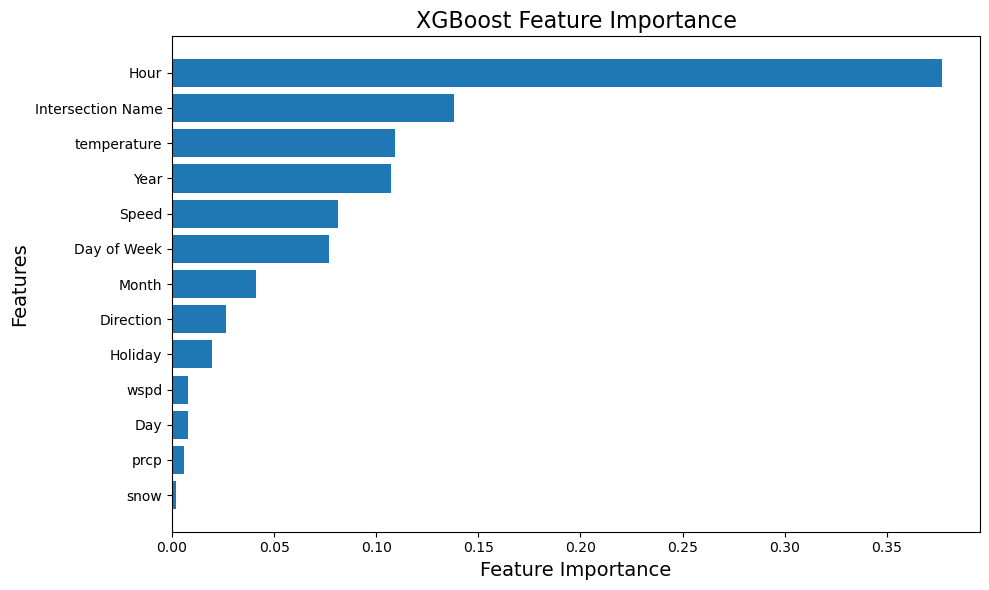

In [223]:
# Plot Feature Importance (Horizontal Bar Chart)
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], align='center')
plt.xlabel('Feature Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.title('XGBoost Feature Importance', fontsize=16)
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.tight_layout()
plt.show()

## LSTM to predict general traffic volume

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

In [3]:
data2 = pd.read_csv('traffic_weather.csv')
# Encode categorical variables
label_encoder = LabelEncoder()
data2['Intersection Name'] = label_encoder.fit_transform(data2['Intersection Name'])
data2['Direction'] = label_encoder.fit_transform(data2['Direction'])

# Select predictors and target
features = [
    'Intersection Name', 'Month', 'Day', 'Year', 'Hour', 'Day of Week',
    'Holiday', 'Direction', 'Speed', 'prcp', 'snow', 'wspd', 'temperature'
]
X = data2[features]
y = data2['Volume']

In [5]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale predictors
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Scale target variable
scaler_y = MinMaxScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

# Reshape data for LSTM
timesteps = 1  # Single timestep
X_train_lstm = np.reshape(X_train_scaled, (X_train_scaled.shape[0], timesteps, X_train_scaled.shape[1]))
X_test_lstm = np.reshape(X_test_scaled, (X_test_scaled.shape[0], timesteps, X_test_scaled.shape[1]))


In [9]:
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


# Build the LSTM model
model = Sequential([
    Input(shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    LSTM(64, return_sequences=True),
    Dropout(0.2),
    LSTM(32, return_sequences=False),
    Dropout(0.2),
    Dense(1)  # Single output for predicting 'Volume'
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(
    X_train_lstm, y_train_scaled,
    epochs=10, batch_size=32,
    validation_data=(X_test_lstm, y_test_scaled),
    verbose=1
)

# Make predictions
y_pred_scaled = model.predict(X_test_lstm)
y_pred = scaler_y.inverse_transform(y_pred_scaled)  # Rescale predictions
y_test_rescaled = scaler_y.inverse_transform(y_test_scaled)  # Rescale true values

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test_rescaled, y_pred))
r2 = r2_score(y_test_rescaled, y_pred)

print(f"LSTM RMSE: {rmse}")
print(f"LSTM R²: {r2}")

Epoch 1/10
14160/14160 ━━━━━━━━━━━━━━━━━━━━ 12s 806us/step - loss: 0.0058 - val_loss: 0.0033
Epoch 2/10
14160/14160 ━━━━━━━━━━━━━━━━━━━━ 11s 790us/step - loss: 0.0034 - val_loss: 0.0023
Epoch 3/10
14160/14160 ━━━━━━━━━━━━━━━━━━━━ 11s 790us/step - loss: 0.0028 - val_loss: 0.0020
Epoch 4/10
14160/14160 ━━━━━━━━━━━━━━━━━━━━ 11s 782us/step - loss: 0.0025 - val_loss: 0.0018
Epoch 5/10
14160/14160 ━━━━━━━━━━━━━━━━━━━━ 11s 786us/step - loss: 0.0023 - val_loss: 0.0017
Epoch 6/10
14160/14160 ━━━━━━━━━━━━━━━━━━━━ 11s 790us/step - loss: 0.0022 - val_loss: 0.0016
Epoch 7/10
14160/14160 ━━━━━━━━━━━━━━━━━━━━ 11s 786us/step - loss: 0.0021 - val_loss: 0.0015
Epoch 8/10
14160/14160 ━━━━━━━━━━━━━━━━━━━━ 11s 781us/step - loss: 0.0020 - val_loss: 0.0015
Epoch 9/10
14160/14160 ━━━━━━━━━━━━━━━━━━━━ 11s 792us/step - loss: 0.0020 - val_loss: 0.0014
Epoch 10/10
14160/14160 ━━━━━━━━━━━━━━━━━━━━ 11s 789us/step - loss: 0.0019 - val_loss: 0.0014
3540/3540 ━━━━━━━━━━━━━━━━━━━━ 1s 339us/step
LSTM RMSE: 149.151762958

## LSTM (Using morning-traffic to predict afternoon traffic) - Time series forecasting

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


In [7]:
data1 = pd.read_csv('traffic_weather.csv')

In [9]:
data1.head(50)

,Intersection Name,Month,Day,Year,Hour,Day of Week,Holiday,Direction,Speed,Volume,Full Date,date,tavg,tmin,tmax,prcp,snow,wspd,temperature
0,Azie MortonBarton Springs,7,9,2019,1,2,0,NB,28.0,9.0,2019-07-09 01:00:00,7/9/19,29.5,23.9,36.1,0.0,0,7.2,23.900000
1,Azie MortonBarton Springs,7,9,2019,1,2,0,SB,24.0,8.0,2019-07-09 01:00:00,7/9/19,29.5,23.9,36.1,0.0,0,7.2,23.900000
2,Azie MortonBarton Springs,7,9,2019,0,2,0,NB,28.0,25.0,2019-07-09 00:00:00,7/9/19,29.5,23.9,36.1,0.0,0,7.2,23.900000
3,Azie MortonBarton Springs,7,9,2019,0,2,0,SB,28.0,36.0,2019-07-09 00:00:00,7/9/19,29.5,23.9,36.1,0.0,0,7.2,23.900000
4,Azie MortonBarton Springs,7,8,2019,23,1,0,NB,27.0,26.0,2019-07-08 23:00:00,7/8/19,28.1,22.2,36.1,9.7,0,6.1,33.227611
5,Azie MortonBarton Springs,7,8,2019,23,1,0,SB,28.0,54.0,2019-07-08 23:00:00,7/8/19,28.1,22.2,36.1,9.7,0,6.1,33.227611
6,Azie MortonBarton Springs,7,8,2019,22,1,0,NB,27.0,82.0,2019-07-08 22:00:00,7/8/19,28.1,22.2,36.1,9.7,0,6.1,34.237753
7,Azie MortonBarton Springs,7,8,2019,22,1,0,SB,28.0,107.0,2019-07-08 22:00:00,7/8/19,28.1,22.2,36.1,9.7,0,6.1,34.237753
8,Azie MortonBarton Springs,7,8,2019,21,1,0,NB,26.0,99.0,2019-07-08 21:00:00,7/8/19,28.1,22.2,36.1,9.7,0,6.1,35.041926
9,Azie MortonBarton Springs,7,8,2019,21,1,0,SB,27.0,159.0,2019-07-08 21:00:00,7/8/19,28.1,22.2,36.1,9.7,0,6.1,35.041926


In [11]:
# Convert 'Full Date' to datetime format
data1['Full Date'] = pd.to_datetime(data1['Full Date'], errors='coerce')

# Check if there are any invalid datetime values
print(data1['Full Date'].isna().sum())  # Should return 0 if all values are valid

# Drop rows with invalid datetime values, if any
data1 = data1.dropna(subset=['Full Date'])

# Proceed with creating Morning_Traffic and Afternoon_Traffic
# Define morning and afternoon hours
morning_hours = [6, 7, 8, 9]  # Morning rush hours
afternoon_hours = [15, 16, 17, 18]  # Afternoon rush hours

# Compute Morning_Traffic
morning_traffic = data1[data1['Hour'].isin(morning_hours)].groupby(data1['Full Date'].dt.date)['Volume'].sum()
data1['Morning_Traffic'] = data1['Full Date'].dt.date.map(morning_traffic)

# Compute Afternoon_Traffic
afternoon_traffic = data1[data1['Hour'].isin(afternoon_hours)].groupby(data1['Full Date'].dt.date)['Volume'].sum()
data1['Afternoon_Traffic'] = data1['Full Date'].dt.date.map(afternoon_traffic)

# Drop rows with missing Morning_Traffic or Afternoon_Traffic
data1 = data1.dropna(subset=['Morning_Traffic', 'Afternoon_Traffic'])

# Debug: Check the results
print(data1[['Full Date', 'Hour', 'Volume', 'Morning_Traffic', 'Afternoon_Traffic']].head(20))

# Add lagged variables
data1['Lag_Morning_Traffic'] = data1['Morning_Traffic'].shift(1)  # Previous day morning traffic
data1['Lag_Afternoon_Traffic'] = data1['Afternoon_Traffic'].shift(1)  # Previous day afternoon traffic
data1 = data1.dropna(subset=['Lag_Morning_Traffic', 'Lag_Afternoon_Traffic'])  # Drop NaN rows

0
             Full Date  Hour  Volume  Morning_Traffic  Afternoon_Traffic
0  2019-07-09 01:00:00     1     9.0          84095.0           118059.0
1  2019-07-09 01:00:00     1     8.0          84095.0           118059.0
2  2019-07-09 00:00:00     0    25.0          84095.0           118059.0
3  2019-07-09 00:00:00     0    36.0          84095.0           118059.0
4  2019-07-08 23:00:00    23    26.0          83177.0           117412.0
5  2019-07-08 23:00:00    23    54.0          83177.0           117412.0
6  2019-07-08 22:00:00    22    82.0          83177.0           117412.0
7  2019-07-08 22:00:00    22   107.0          83177.0           117412.0
8  2019-07-08 21:00:00    21    99.0          83177.0           117412.0
9  2019-07-08 21:00:00    21   159.0          83177.0           117412.0
10 2019-07-08 20:00:00    20   140.0          83177.0           117412.0
11 2019-07-08 20:00:00    20   219.0          83177.0           117412.0
12 2019-07-08 19:00:00    19   206.0          831

In [13]:
# Encode categorical variables
label_encoder = LabelEncoder()
data1['Intersection Name'] = label_encoder.fit_transform(data1['Intersection Name'])
data1['Direction'] = label_encoder.fit_transform(data1['Direction'])

# One-hot encode 'Day of Week'
data1 = pd.get_dummies(data1, columns=['Day of Week'], drop_first=True)

# Define predictors
features = [
    'Morning_Traffic','Lag_Morning_Traffic', 'Lag_Afternoon_Traffic', 'Intersection Name', 'Month', 'Holiday', 'Direction',
    'Speed', 'prcp', 'wspd', 'temperature'
] + [col for col in data1.columns if col.startswith('Day of Week_')]

X = data1[features]
y = data1['Afternoon_Traffic']

# Scale features
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

In [15]:
# Reshape for LSTM
X_lstm = np.reshape(X_scaled, (X_scaled.shape[0], 1, X_scaled.shape[1]))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_lstm, y_scaled, test_size=0.2, random_state=42)

# Build the LSTM model
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(32, return_sequences=False),
    Dropout(0.2),
    Dense(1)  # Single output
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=20, batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)

# Predict on the test set
y_pred_scaled = model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled)  # Rescale predictions
y_test_rescaled = scaler_y.inverse_transform(y_test)  # Rescale true values

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test_rescaled, y_pred))
r2 = r2_score(y_test_rescaled, y_pred)

print(f"LSTM RMSE: {rmse}")
print(f"LSTM R²: {r2}")

Epoch 1/20


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13851/13851 ━━━━━━━━━━━━━━━━━━━━ 12s 816us/step - loss: 0.0081 - val_loss: 1.6504e-04
Epoch 2/20
13851/13851 ━━━━━━━━━━━━━━━━━━━━ 11s 794us/step - loss: 7.0438e-04 - val_loss: 1.8210e-04
Epoch 3/20
13851/13851 ━━━━━━━━━━━━━━━━━━━━ 11s 788us/step - loss: 6.7289e-04 - val_loss: 1.5110e-04
Epoch 4/20
13851/13851 ━━━━━━━━━━━━━━━━━━━━ 11s 782us/step - loss: 6.5123e-04 - val_loss: 2.0984e-04
Epoch 5/20
13851/13851 ━━━━━━━━━━━━━━━━━━━━ 11s 801us/step - loss: 6.4374e-04 - val_loss: 1.9694e-04
Epoch 6/20
13851/13851 ━━━━━━━━━━━━━━━━━━━━ 11s 797us/step - loss: 6.5799e-04 - val_loss: 1.5464e-04
Epoch 7/20
13851/13851 ━━━━━━━━━━━━━━━━━━━━ 11s 801us/step - loss: 6.4194e-04 - val_loss: 2.1566e-04
Epoch 8/20
13851/13851 ━━━━━━━━━━━━━━━━━━━━ 11s 804us/step - loss: 6.3298e-04 - val_loss: 1.4452e-04
Epoch 9/20
13851/13851 ━━━━━━━━━━━━━━━━━━━━ 11s 804us/step - loss: 6.2776e-04 - val_loss: 1.5363e-04
Epoch 10/20
13851/13851 ━━━━━━━━━━━━━━━━━━━━ 11s 806us/step - loss: 6.2507e-04 - val_loss: 1.9597e-04
Epoc